<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загружаем данные</a></span></li><li><span><a href="#Удаляем-пустые-колонки" data-toc-modified-id="Удаляем-пустые-колонки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Удаляем пустые колонки</a></span></li><li><span><a href="#Проверка-корректности-типов-данных-и-их-замена" data-toc-modified-id="Проверка-корректности-типов-данных-и-их-замена-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка корректности типов данных и их замена</a></span></li></ul></li></ul></div>

# Тест

## Загрузка данных

### Импорт библиотек

In [1]:
import os
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import plotly

from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 65) #устанавливаем максимальное число отображаемых колонок
pd.set_option('display.max_rows', 70)
pd.set_option('max_colwidth', 1)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

def load_csv_choose_path(file):
    if os.path.exists(file):
        db = pd.read_csv(file, sep = ';')
    elif os.path.exists('/datasets/'+file):
        db = pd.read_csv('/datasets/'+file, sep = ',')
    else:
        raise FileNotFoundError(file)
    return db

In [2]:
print (pd.__version__) #проверка версии Pandas

1.3.5


### Загружаем данные

In [3]:
data = load_csv_choose_path('dataset.csv')

In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60950 entries, 0 to 60949
Data columns (total 61 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Название курса                                                   60950 non-null  object 
 1   Идентификатор курса                                              60950 non-null  object 
 2   Дата последнего обновления структуры курса                       60950 non-null  object 
 3   Группа курса                                                     0 non-null      float64
 4   Менеджеры курса                                                  0 non-null      float64
 5   Номер темы                                                       0 non-null      float64
 6   ID обучающегося в курсе                                          60950 non-null  int64  
 7   Идентификатор обучающегося              

None

In [5]:
# смотрим пропущеный значения в %
data.isnull().sum()/data.shape[0]*100

Название курса                                                     0.000000  
Идентификатор курса                                                0.000000  
Дата последнего обновления структуры курса                         0.000000  
Группа курса                                                       100.000000
Менеджеры курса                                                    100.000000
Номер темы                                                         100.000000
ID обучающегося в курсе                                            0.000000  
Идентификатор обучающегося                                         0.000000  
ФИО                                                                0.000000  
В какой сущности потерялся                                         57.547170 
Дата завершения курса                                              39.433962 
Прогресс по курсу                                                  0.000000  
Дата получения прогресса >= 80% по курсу                        

In [6]:
data.head(10)

,Название курса,Идентификатор курса,Дата последнего обновления структуры курса,Группа курса,Менеджеры курса,Номер темы,ID обучающегося в курсе,Идентификатор обучающегося,ФИО,В какой сущности потерялся,Дата завершения курса,Прогресс по курсу,Дата получения прогресса >= 80% по курсу,Результат по курсу,Дата начала изучения курса,Статус по курсу,"Средняя оценка, выставленная за курс",Последняя выставленная оценка курсу,Дата последней выставленной оценки,Комментарий,Дата комментария,Количество входов в курс,Количество неактивных дней в курсе,Последний вход в курс,Время изучения курса,Время повторения курса,Общее время в курсе,Количество сессий всего,Количество сессий изучения курса,Количество сессий повторения курса,Среднее время сессии изучения курса,Среднее время сессии повторения курса,Идентификатор по сущности,Уровень сущности,Название сущности,Полное название сущности (с названиями всех родителей),Порядок сущности,Тип контента сущности,ID родительской сущности,Название родительской сущности,Идентификатор по родительской сущности,Количество прохождений сущности на 100% после прохождения курса,Количество перепрохождений сущности на 100%,Дата последнего passed в сущности,Прогресс по сущности,Дата завершения сущности,Отказы по сущности,Результат по сущности,Дата начала изучения сущности,Статус по сущности,Время изучения сущности,Время повторения сущности,Всё время проведенное в сущности,Попытки повторения по сущности,Попытки изучения по сущности,Все попытки по сущности,Дата назначения курса,Плановый срок изучения курса,Джоб-код назначения,Статус назначения,Дата составления отчета
0,id 116 Анализ информации от 03.08.2021,https://urbanlearning.mguu.ru/xapi/course/116,2021-10-12 13:50:41,NaN,NaN,NaN,3164539,28197@https://urbanlearning.mguu.ru/users,Н/Д,NaN,NaN,0%,NaN,0%,NaN,Не изучал,"0,00","0,00",NaN,NaN,NaN,0,0,NaN,00:00:00,00:00:00,00:00:00,0,0,0,00:00:00,00:00:00,https://urbanlearning.mguu.ru/xapi/blocks/555,0,Введение,Введение,0,Глава,NaN,NaN,NaN,0,0,NaN,0%,NaN,0,0%,NaN,Не приступал,00:00:00,00:00:00,00:00:00,0,0,0,2021-07-28 18:12:46,NaN,NaN,NaN,01.11.2021
1,id 116 Анализ информации от 03.08.2021,https://urbanlearning.mguu.ru/xapi/course/116,2021-10-12 13:50:41,NaN,NaN,NaN,3164539,28197@https://urbanlearning.mguu.ru/users,Н/Д,NaN,NaN,0%,NaN,0%,NaN,Не изучал,"0,00","0,00",NaN,NaN,NaN,0,0,NaN,00:00:00,00:00:00,00:00:00,0,0,0,00:00:00,00:00:00,https://start.mguu.moscow/xapi/analiz_info/vvedenie,1,Введение,Введение > Введение,1,Подглава,13571.0,Введение,https://urbanlearning.mguu.ru/xapi/blocks/555,0,0,NaN,0%,NaN,0,0%,NaN,Не приступал,00:00:00,00:00:00,00:00:00,0,0,0,2021-07-28 18:12:46,NaN,NaN,NaN,01.11.2021
2,id 116 Анализ информации от 03.08.2021,https://urbanlearning.mguu.ru/xapi/course/116,2021-10-12 13:50:41,NaN,NaN,NaN,3164539,28197@https://urbanlearning.mguu.ru/users,Н/Д,NaN,NaN,0%,NaN,0%,NaN,Не изучал,"0,00","0,00",NaN,NaN,NaN,0,0,NaN,00:00:00,00:00:00,00:00:00,0,0,0,00:00:00,00:00:00,https://start.mguu.moscow/xapi/analiz_info/vvedenie/longread,2,Введение,Введение > Введение > Введение,0,Лонгрид,13572.0,Введение,https://start.mguu.moscow/xapi/analiz_info/vvedenie,0,0,NaN,0%,NaN,0,0%,NaN,Не приступал,00:00:00,00:00:00,00:00:00,0,0,0,2021-07-28 18:12:46,NaN,NaN,NaN,01.11.2021
3,id 116 Анализ информации от 03.08.2021,https://urbanlearning.mguu.ru/xapi/course/116,2021-10-12 13:50:41,NaN,NaN,NaN,3164539,28197@https://urbanlearning.mguu.ru/users,Н/Д,NaN,NaN,0%,NaN,0%,NaN,Не изучал,"0,00","0,00",NaN,NaN,NaN,0,0,NaN,00:00:00,00:00:00,00:00:00,0,0,0,00:00:00,00:00:00,https://start.mguu.moscow/xapi/analiz_info/vvedenie/quest,2,Финальное задание,Введение > Введение > Финальное задание,1,Тест,13572.0,Введение,https://start.mguu.moscow/xapi/analiz_info/vvedenie,0,0,NaN,0%,NaN,0,0%,NaN,Не приступал,00:00:00,00:00:00,00:00:00,0,0,0,2021-07-28 18:12:46,NaN,NaN,NaN,01.11.2021
4,id 116 Анализ информации от 03.08.2021,https://urbanlearning.mguu.ru/xapi/course/116,2021-10-12 13:50:41,NaN,NaN,NaN,3164539,28197@https://urbanlearning.mguu.ru/use

### Удаляем пустые колонки

In [7]:
data.drop(['Группа курса', 'Менеджеры курса', 'Номер темы', 
           'Дата последней выставленной оценки', 'Комментарий', 'Дата комментария', 
           'Плановый срок изучения курса', 'Джоб-код назначения','Статус назначения'], axis=1, inplace=True)

### Проверка корректности типов данных и их замена

In [8]:
data['Дата последнего обновления структуры курса'] = pd.to_datetime(data['Дата последнего обновления структуры курса'], format='%Y-%m-%dT%H:%M:%S')
data['Дата завершения курса'] = pd.to_datetime(data['Дата завершения курса'], format='%Y-%m-%dT%H:%M:%S')
data['Дата получения прогресса >= 80% по курсу'] = pd.to_datetime(data['Дата получения прогресса >= 80% по курсу'], format='%Y-%m-%dT%H:%M:%S')
data['Дата начала изучения курса'] = pd.to_datetime(data['Дата начала изучения курса'], format='%Y-%m-%dT%H:%M:%S')
data['Последний вход в курс'] = pd.to_datetime(data['Последний вход в курс'], format='%Y-%m-%dT%H:%M:%S')
data['Дата последнего passed в сущности'] = pd.to_datetime(data['Дата последнего passed в сущности'], format='%Y-%m-%dT%H:%M:%S')

data['Дата завершения сущности'] = pd.to_datetime(data['Дата завершения сущности'], format='%Y-%m-%dT%H:%M:%S')
data['Дата начала изучения сущности'] = pd.to_datetime(data['Дата начала изучения сущности'], format='%Y-%m-%dT%H:%M:%S')
data['Дата назначения курса'] = pd.to_datetime(data['Дата назначения курса'], format='%Y-%m-%dT%H:%M:%S')
data['Дата составления отчета'] = pd.to_datetime(data['Дата составления отчета'], format='%d.%m.%Y')



In [9]:
data['Среднее время сессии изучения курса'] = pd.to_datetime(data['Среднее время сессии изучения курса'], format='%H:%M:%S')
data['Среднее время сессии повторения курса'] = pd.to_datetime(data['Среднее время сессии повторения курса'], format='%H:%M:%S')


In [10]:
data['Прогресс по курсу'] = data['Прогресс по курсу'].apply(lambda x: x.replace('%', '').replace(',', '.')).astype('float') / 100
data['Результат по курсу'] = data['Результат по курсу'].apply(lambda x: x.replace('%', '').replace(',', '.')).astype('float') / 100
data['Средняя оценка, выставленная за курс'] = data['Средняя оценка, выставленная за курс'].apply(lambda x: x.replace(',', '.')).astype('float') / 100
data['Последняя выставленная оценка курсу'] = data['Последняя выставленная оценка курсу'].apply(lambda x: x.replace(',', '.')).astype('float') / 100


In [11]:
# Переводим в секунды
data['Время изучения курса'] = pd.to_timedelta(data['Время изучения курса']).apply(lambda x: x.total_seconds()).astype('int64')
data['Время повторения курса'] = pd.to_timedelta(data['Время повторения курса']).apply(lambda x: x.total_seconds()).astype('int64')
data['Общее время в курсе'] = pd.to_timedelta(data['Общее время в курсе']).apply(lambda x: x.total_seconds()).astype('int64')

In [12]:
# переименовываем столбцы
data.rename(columns={"Время изучения курса": "Время изучения курса (сек)", "Время повторения курса": "Время повторения курса (сек)", "Общее время в курсе": "Общее время в курсе (сек)"}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60950 entries, 0 to 60949
Data columns (total 52 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Название курса                                                   60950 non-null  object        
 1   Идентификатор курса                                              60950 non-null  object        
 2   Дата последнего обновления структуры курса                       60950 non-null  datetime64[ns]
 3   ID обучающегося в курсе                                          60950 non-null  int64         
 4   Идентификатор обучающегося                                       60950 non-null  object        
 5   ФИО                                                              60950 non-null  object        
 6   В какой сущности потерялся                                       25875 non-nul

In [13]:
data ["Название курса"].unique()

array(['id 116 Анализ информации от 03.08.2021'], dtype=object)

In [14]:
data ["Идентификатор курса"].unique()

array(['https://urbanlearning.mguu.ru/xapi/course/116'], dtype=object)

In [15]:
len(data['ID обучающегося в курсе'].unique())

530

In [16]:
data['Дата последнего обновления структуры курса'].unique()

array(['2021-10-12T13:50:41.000000000'], dtype='datetime64[ns]')

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий</b>
    
в таблице содержаться данные по курсу <b> id 116 Анализ информации от 03.08.2021</b><br> 
Идентификатор курса  <b>https://urbanlearning.mguu.ru/xapi/course/116</b><br>
Курс последний раз обновлялся 12 октября 2021 года<br>   

Всего 60950 записей    
информация о 530 уникальных обучающихся    </div>

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID обучающегося в курсе,60950.0,3.198834e+06,43742.322727,3164539.0,3.191999e+06,3.192256e+06,3.192416e+06,3635934.000
Прогресс по курсу,60950.0,6.737842e-01,0.386223,0.0,2.917000e-01,9.333000e-01,9.458000e-01,1.000
Результат по курсу,60950.0,1.574475e-01,0.091103,0.0,6.570000e-02,2.230000e-01,2.238000e-01,0.329
"Средняя оценка, выставленная за курс",60950.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000
Последняя выставленная оценка курсу,60950.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000
Количество входов в курс,60950.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000
Количество неактивных дней в курсе,60950.0,4.049057e+01,21.566330,0.0,3.100000e+01,4.100000e+01,4.600000e+01,90.000
Время изучения курса (сек),60950.0,2.436492e+04,35450.640788,0.0,6.837000e+03,2.246450e+04,3.340600e+04,600175.000
Время повторения курса (сек),60950.0,1.825736e+02,2528.412144,0.0,0.000000e+00,7.000000e+00,2.000000e+01,56055.000
Общее время в курсе (сек),60950.0,2.454749e+04,35553.836119,0.0,6.837000e+03,2.263150e+04,3.354700e+04,600175.000


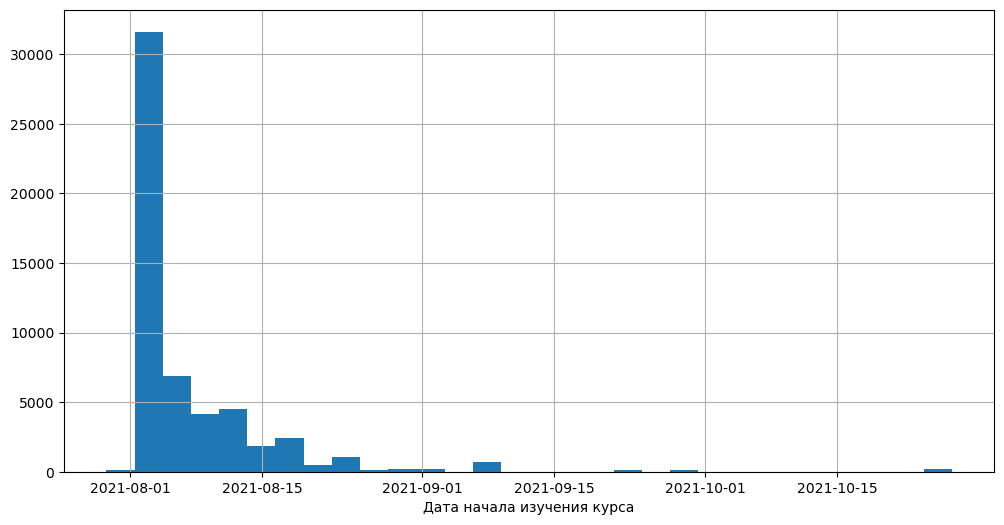

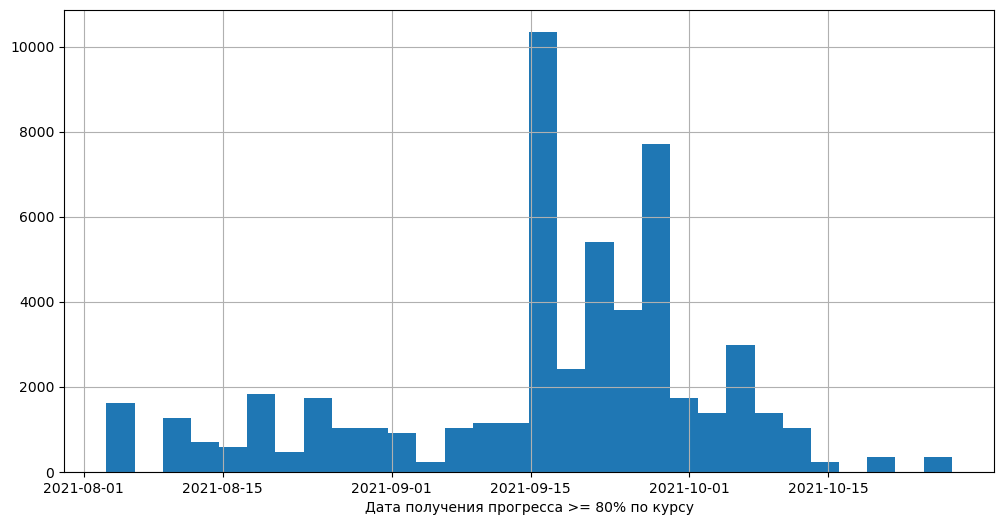

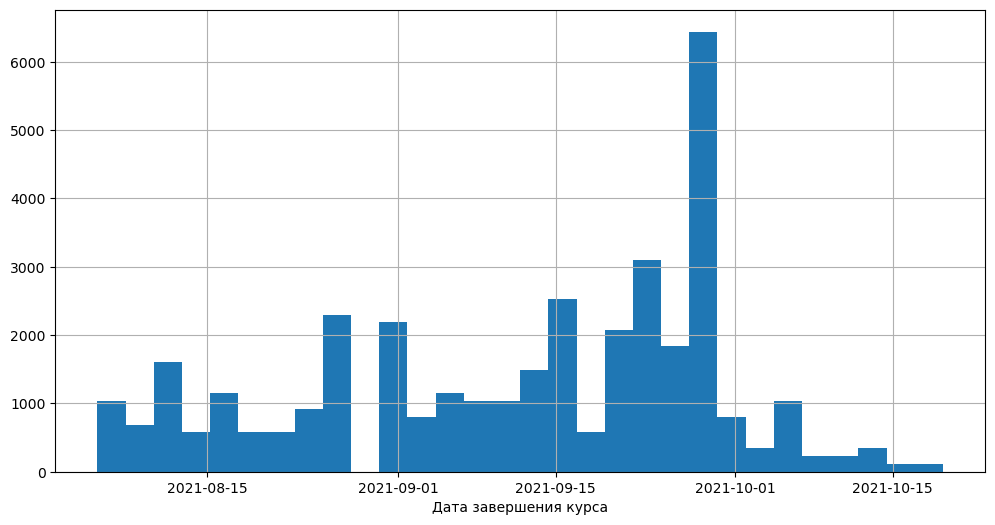

In [18]:
plt.xlabel('Дата начала изучения курса')
data['Дата начала изучения курса'].hist(bins=30, figsize=(12, 6))
plt.show()
plt.xlabel('Дата получения прогресса >= 80% по курсу')
data['Дата получения прогресса >= 80% по курсу'].hist(bins=30, figsize=(12, 6))
plt.show()
plt.xlabel('Дата завершения курса')
data['Дата завершения курса'].hist(bins=30, figsize=(12, 6))
plt.show()

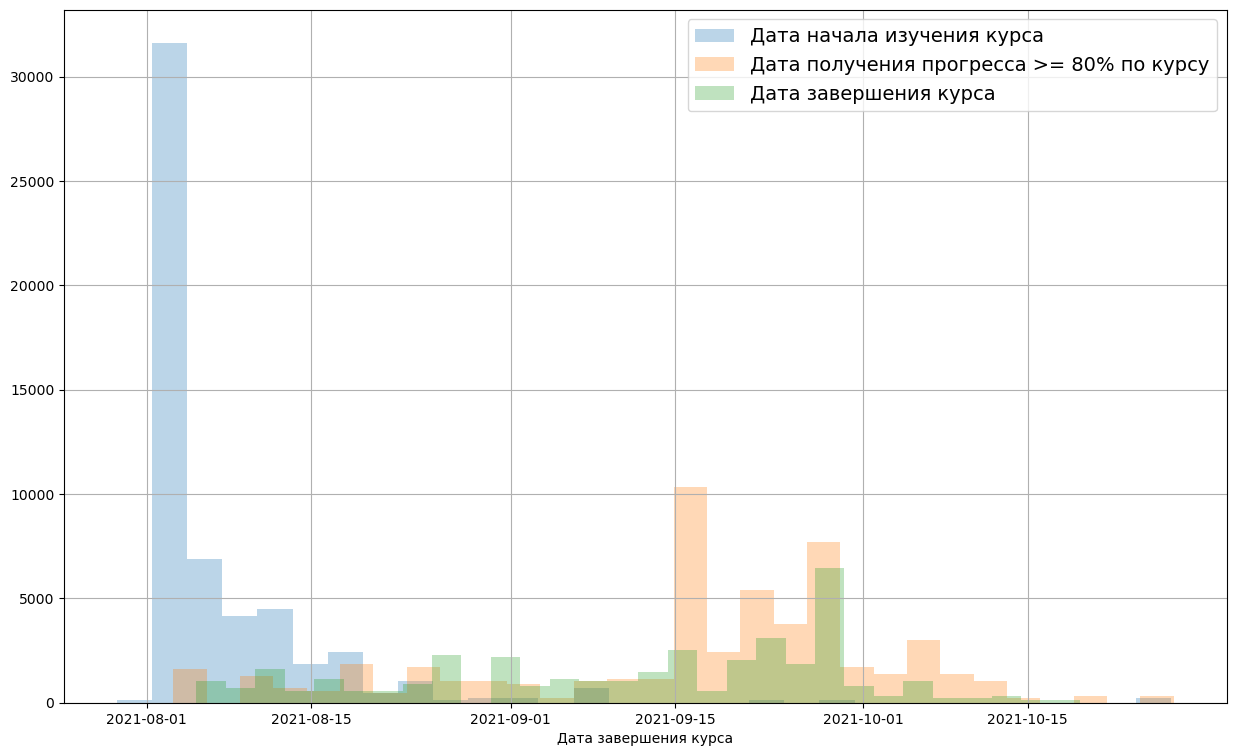

In [19]:
plt.figure(figsize=(15, 9))
plt.xlabel('Дата начала изучения курса')
data['Дата начала изучения курса'].hist(bins=30, alpha = 0.3)

plt.xlabel('Дата получения прогресса >= 80% по курсу')
data['Дата получения прогресса >= 80% по курсу'].hist(bins=30, alpha = 0.3)

plt.xlabel('Дата завершения курса')
data['Дата завершения курса'].hist(bins=30, alpha = 0.3)

plt.legend(['Дата начала изучения курса','Дата получения прогресса >= 80% по курсу', 'Дата завершения курса'], loc=1, fontsize=14)
plt.show()



<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий</b>
    
Курс стартовал 01 августа 21, в период с 15 сентября по 30 сентября большая часть обучающихся прошли более 80% курса и к 1 октября большинство закончили курс
</div>

In [20]:
data['Прогресс по курсу'].describe()

count    60950.000000
mean     0.673784    
std      0.386223    
min      0.000000    
25%      0.291700    
50%      0.933300    
75%      0.945800    
max      1.000000    
Name: Прогресс по курсу, dtype: float64

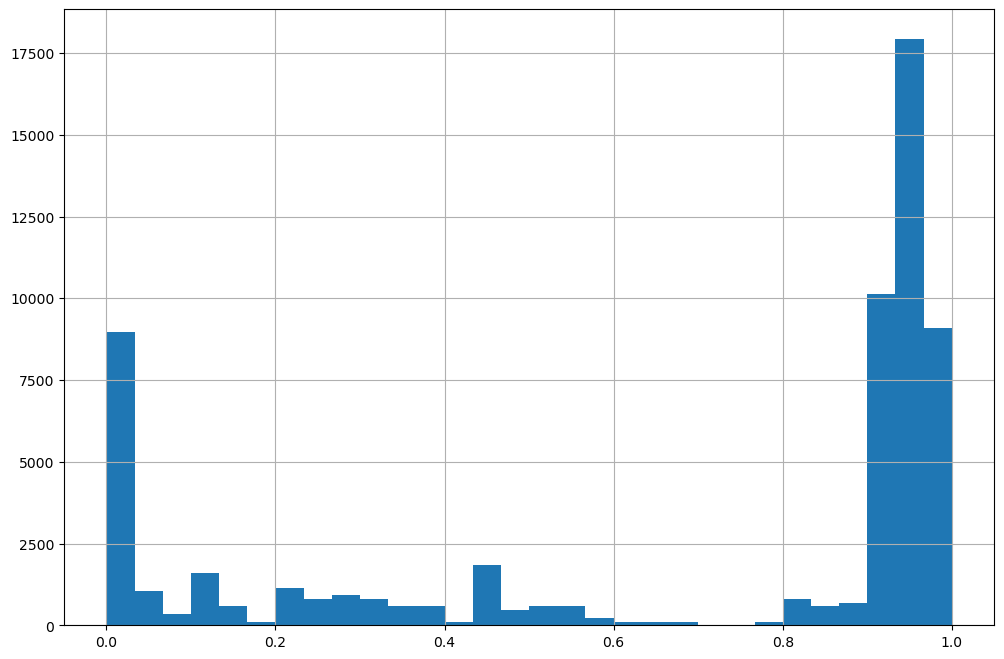

In [21]:
data['Прогресс по курсу'].hist(bins=30, figsize=(12,8))
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий</b>
    
Судя по прогрессу достаточно успешное прохождение курса,<br>
большая часть обучающихся преодолели 90% курса    

медианое значение 93%<br>
среднее зачение 67%    
</div>

In [22]:
data.groupby('Статус по курсу')['ID обучающегося в курсе'].count()

Статус по курсу
Изучает      17825
Изучил       36915
Не изучал    6210 
Name: ID обучающегося в курсе, dtype: int64

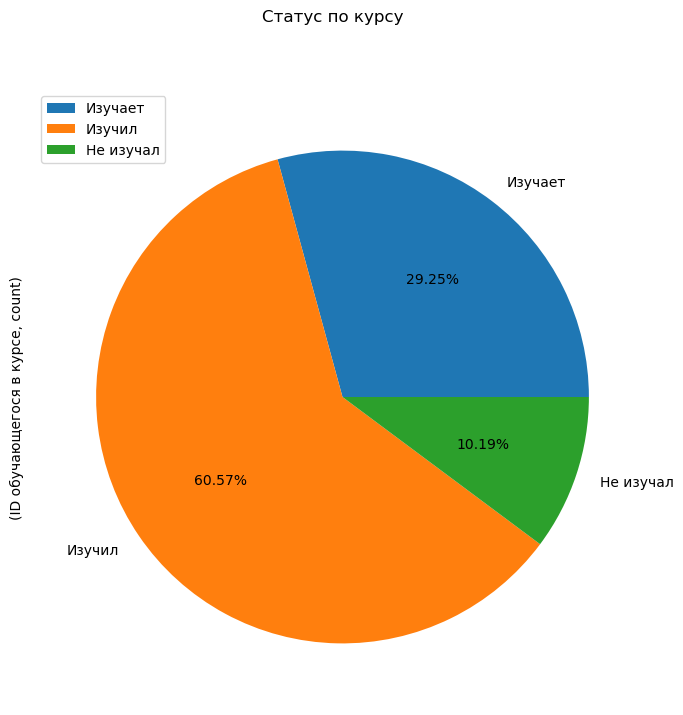

In [23]:
data.groupby('Статус по курсу').agg({'ID обучающегося в курсе':['count']}).plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.2f%%', title = 'Статус по курсу');

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий</b>
    
<b> Статус по курсу</b> <br>
Изучает     <b> 29.25%</b> <br>
Изучил      <b> 60.57%</b> <br>
Не изучал   <b> 10.19%</b> <br>    
</div>

In [24]:
data ["Средняя оценка, выставленная за курс"].unique()

array([0.])

In [25]:
data ["Последняя выставленная оценка курсу"].unique()

array([0.])

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий</b>
    
Данных об оценках нет   
</div>

<AxesSubplot:>

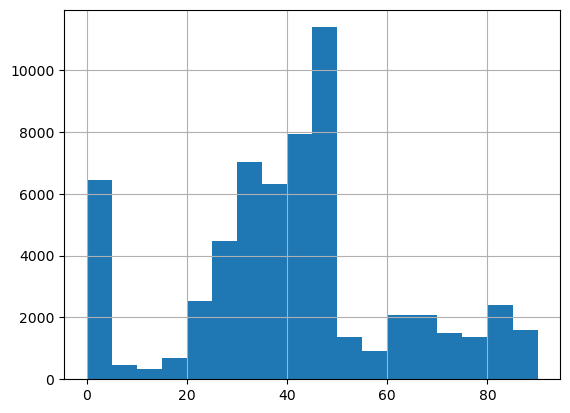

In [26]:
data ["Количество неактивных дней в курсе"].hist(bins=18)

In [27]:
# переводим в часы
(data['Время изучения курса (сек)'] / 3660).describe()

count    60950.000000
mean     6.657082    
std      9.685967    
min      0.000000    
25%      1.868033    
50%      6.137842    
75%      9.127322    
max      163.982240  
Name: Время изучения курса (сек), dtype: float64

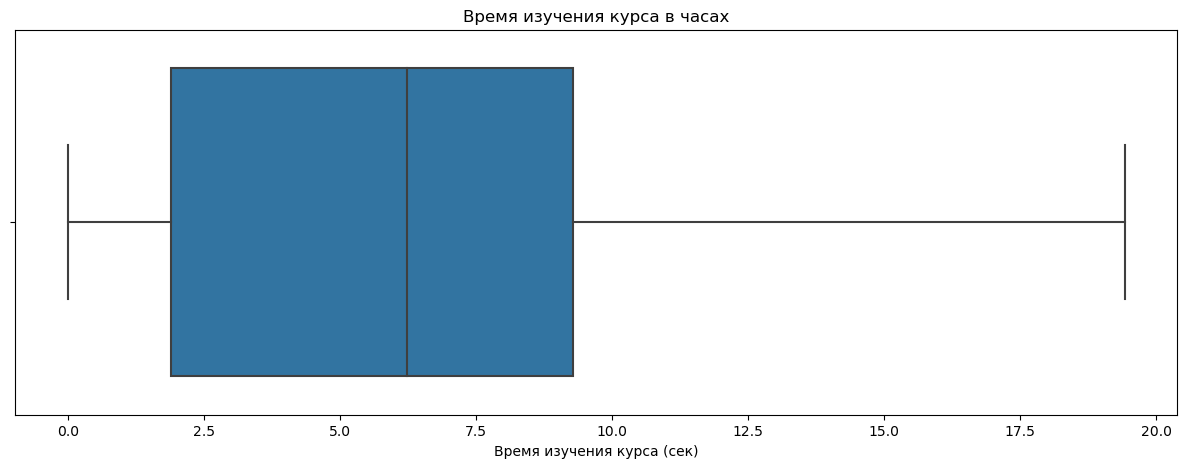

In [28]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x=(data['Время изучения курса (сек)'] / 3600),showfliers = False)
plt.title('Время изучения курса в часах')
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий</b>
    
Среднее (6.66 часов) и медиана (6.14 часов) близки и составляют чуть больше 6 часов</div>

In [29]:
data["Количество сессий всего"].describe()

count    60950.000000
mean     20.201887   
std      15.296654   
min      0.000000    
25%      7.000000    
50%      19.000000   
75%      31.000000   
max      80.000000   
Name: Количество сессий всего, dtype: float64

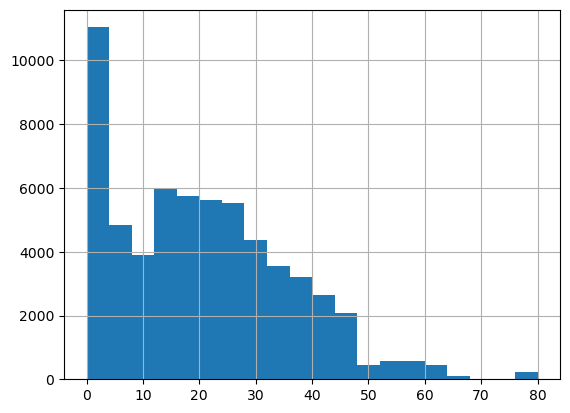

In [30]:
data ["Количество сессий всего"].hist(bins=20);